In [29]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
from sklearn.preprocessing import StandardScaler, normalize
from sklearn.metrics import silhouette_score
from sklearn.cluster import KMeans
from sklearn.decomposition import PCA

import warnings
warnings.filterwarnings('ignore')

In [2]:
data = pd.read_csv('CC GENERAL.csv')

In [3]:
data.head(10)

,CUST_ID,BALANCE,BALANCE_FREQUENCY,PURCHASES,ONEOFF_PURCHASES,INSTALLMENTS_PURCHASES,CASH_ADVANCE,PURCHASES_FREQUENCY,ONEOFF_PURCHASES_FREQUENCY,PURCHASES_INSTALLMENTS_FREQUENCY,CASH_ADVANCE_FREQUENCY,CASH_ADVANCE_TRX,PURCHASES_TRX,CREDIT_LIMIT,PAYMENTS,MINIMUM_PAYMENTS,PRC_FULL_PAYMENT,TENURE
0,C10001,40.900749,0.818182,95.40,0.00,95.40,0.000000,0.166667,0.000000,0.083333,0.000000,0,2,1000.0,201.802084,139.509787,0.000000,12
1,C10002,3202.467416,0.909091,0.00,0.00,0.00,6442.945483,0.000000,0.000000,0.000000,0.250000,4,0,7000.0,4103.032597,1072.340217,0.222222,12
2,C10003,2495.148862,1.000000,773.17,773.17,0.00,0.000000,1.000000,1.000000,0.000000,0.000000,0,12,7500.0,622.066742,627.284787,0.000000,12
3,C10004,1666.670542,0.636364,1499.00,1499.00,0.00,205.788017,0.083333,0.083333,0.000000,0.083333,1,1,7500.0,0.000000,NaN,0.000000,12
4,C10005,817.714335,1.000000,16.00,16.00,0.00,0.000000,0.083333,0.083333,0.000000,0.000000,0,1,1200.0,678.334763,244.791237,0.000000,12
5,C10006,1809.828751,1.000000,1333.28,0.00,1333.28,0.000000,0.666667,0.000000,0.583333,0.000000,0,8,1800.0,1400.057770,2407.246035,0.000000,12
6,C10007,627.260806,1.000000,7091.01,6402.63,688.38,0.000000,1.000000,1.000000,1.000000,0.000000,0,64,13500.0,6354.314328,198.065894,1.000000,12
7,C10008,1823.652743,1.000000,436.20,0.00,436.20,0.000000,1.000000,0.000000,1.000000,0.000000,0,12,2300.0,679.065082,532.033990,0.000000,12
8,C10009,1014.926473,1.000000,861.49,661.49,200.00,0.000000,0.333333,0.083333,0.250000,0.000000,0,5,7000.0,688.278568,311.963409,0.000000,12
9,C10010,152.225975,0.545455,1281.60,1281.60,0.00,0.000000,0.166667,0.166667,0.000000,0.000000,0,3,11000.0,1164.770591,100.302262,0.000000,12


## Data Exploration

In [4]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 8950 entries, 0 to 8949
Data columns (total 18 columns):
 #   Column                            Non-Null Count  Dtype  
---  ------                            --------------  -----  
 0   CUST_ID                           8950 non-null   object 
 1   BALANCE                           8950 non-null   float64
 2   BALANCE_FREQUENCY                 8950 non-null   float64
 3   PURCHASES                         8950 non-null   float64
 4   ONEOFF_PURCHASES                  8950 non-null   float64
 5   INSTALLMENTS_PURCHASES            8950 non-null   float64
 6   CASH_ADVANCE                      8950 non-null   float64
 7   PURCHASES_FREQUENCY               8950 non-null   float64
 8   ONEOFF_PURCHASES_FREQUENCY        8950 non-null   float64
 9   PURCHASES_INSTALLMENTS_FREQUENCY  8950 non-null   float64
 10  CASH_ADVANCE_FREQUENCY            8950 non-null   float64
 11  CASH_ADVANCE_TRX                  8950 non-null   int64  
 12  PURCHA

In [5]:
data.shape

(8950, 18)

In [6]:
data.isnull().sum()

CUST_ID                               0
BALANCE                               0
BALANCE_FREQUENCY                     0
PURCHASES                             0
ONEOFF_PURCHASES                      0
INSTALLMENTS_PURCHASES                0
CASH_ADVANCE                          0
PURCHASES_FREQUENCY                   0
ONEOFF_PURCHASES_FREQUENCY            0
PURCHASES_INSTALLMENTS_FREQUENCY      0
CASH_ADVANCE_FREQUENCY                0
CASH_ADVANCE_TRX                      0
PURCHASES_TRX                         0
CREDIT_LIMIT                          1
PAYMENTS                              0
MINIMUM_PAYMENTS                    313
PRC_FULL_PAYMENT                      0
TENURE                                0
dtype: int64

In [7]:
data.describe()

,BALANCE,BALANCE_FREQUENCY,PURCHASES,ONEOFF_PURCHASES,INSTALLMENTS_PURCHASES,CASH_ADVANCE,PURCHASES_FREQUENCY,ONEOFF_PURCHASES_FREQUENCY,PURCHASES_INSTALLMENTS_FREQUENCY,CASH_ADVANCE_FREQUENCY,CASH_ADVANCE_TRX,PURCHASES_TRX,CREDIT_LIMIT,PAYMENTS,MINIMUM_PAYMENTS,PRC_FULL_PAYMENT,TENURE
count,8950.000000,8950.000000,8950.000000,8950.000000,8950.000000,8950.000000,8950.000000,8950.000000,8950.000000,8950.000000,8950.000000,8950.000000,8949.000000,8950.000000,8637.000000,8950.000000,8950.000000
mean,1564.474828,0.877271,1003.204834,592.437371,411.067645,978.871112,0.490351,0.202458,0.364437,0.135144,3.248827,14.709832,4494.449450,1733.143852,864.206542,0.153715,11.517318
std,2081.531879,0.236904,2136.634782,1659.887917,904.338115,2097.163877,0.401371,0.298336,0.397448,0.200121,6.824647,24.857649,3638.815725,2895.063757,2372.446607,0.292499,1.338331
min,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,50.000000,0.000000,0.019163,0.000000,6.000000
25%,128.281915,0.888889,39.635000,0.000000,0.000000,0.000000,0.083333,0.000000,0.000000,0.000000,0.000000,1.000000,1600.000000,383.276166,169.123707,0.000000,12.000000
50%,873.385231,1.000000,361.280000,38.000000,89.000000,0.000000,0.500000,0.083333,0.166667,0.000000,0.000000,7.000000,3000.000000,856.901546,312.343947,0.000000,12.000000
75%,2054.140036,1.000000,1110.130000,577.405000,468.637500,1113.821139,0.916667,0.300000,0.750000,0.222222,4.000000,17.000000,6500.000000,1901.134317,825.485459,0.142857,12.000000
max,19043.138560,1.000000,49039.570000,40761.250000,22500.000000,47137.211760,1.000000,1.000000,1.000000,1.500000,123.000000,358.000000,30000.000000,50721.483360,76406.207520,1.000000,12.000000


In [8]:
data["CREDIT_LIMIT"].mean()

4494.449450364621

In [9]:
data['MINIMUM_PAYMENTS'].mean()

864.2065423050816

In [10]:
data["MINIMUM_PAYMENTS"].fillna(data["MINIMUM_PAYMENTS"].mean(), inplace=True)

In [12]:
data["CREDIT_LIMIT"].fillna(data["CREDIT_LIMIT"].mean(), inplace=True)

In [13]:
data.isnull().sum()

CUST_ID                             0
BALANCE                             0
BALANCE_FREQUENCY                   0
PURCHASES                           0
ONEOFF_PURCHASES                    0
INSTALLMENTS_PURCHASES              0
CASH_ADVANCE                        0
PURCHASES_FREQUENCY                 0
ONEOFF_PURCHASES_FREQUENCY          0
PURCHASES_INSTALLMENTS_FREQUENCY    0
CASH_ADVANCE_FREQUENCY              0
CASH_ADVANCE_TRX                    0
PURCHASES_TRX                       0
CREDIT_LIMIT                        0
PAYMENTS                            0
MINIMUM_PAYMENTS                    0
PRC_FULL_PAYMENT                    0
TENURE                              0
dtype: int64

In [14]:
data.duplicated().sum()

0

In [15]:
data = data.drop('CUST_ID', axis = 1) 

In [16]:
data.corr()

,BALANCE,BALANCE_FREQUENCY,PURCHASES,ONEOFF_PURCHASES,INSTALLMENTS_PURCHASES,CASH_ADVANCE,PURCHASES_FREQUENCY,ONEOFF_PURCHASES_FREQUENCY,PURCHASES_INSTALLMENTS_FREQUENCY,CASH_ADVANCE_FREQUENCY,CASH_ADVANCE_TRX,PURCHASES_TRX,CREDIT_LIMIT,PAYMENTS,MINIMUM_PAYMENTS,PRC_FULL_PAYMENT,TENURE
BALANCE,1.000000,0.322412,0.181261,0.164350,0.126469,0.496692,-0.077944,0.073166,-0.063186,0.449218,0.385152,0.154338,0.531267,0.322802,0.394282,-0.318959,0.072692
BALANCE_FREQUENCY,0.322412,1.000000,0.133674,0.104323,0.124292,0.099388,0.229715,0.202415,0.176079,0.191873,0.141555,0.189626,0.095795,0.065008,0.114249,-0.095082,0.119776
PURCHASES,0.181261,0.133674,1.000000,0.916845,0.679896,-0.051474,0.393017,0.498430,0.315567,-0.120143,-0.067175,0.689561,0.356959,0.603264,0.093515,0.180379,0.086288
ONEOFF_PURCHASES,0.164350,0.104323,0.916845,1.000000,0.330622,-0.031326,0.264937,0.524891,0.127729,-0.082628,-0.046212,0.545523,0.319721,0.567292,0.048597,0.132763,0.064150
INSTALLMENTS_PURCHASES,0.126469,0.124292,0.679896,0.330622,1.000000,-0.064244,0.442418,0.214042,0.511351,-0.132318,-0.073999,0.628108,0.256496,0.384084,0.131687,0.182569,0.086143
CASH_ADVANCE,0.496692,0.099388,-0.051474,-0.031326,-0.064244,1.000000,-0.215507,-0.086754,-0.177070,0.628522,0.656498,-0.075850,0.303983,0.453238,0.139223,-0.152935,-0.068312
PURCHASES_FREQUENCY,-0.077944,0.229715,0.393017,0.264937,0.442418,-0.215507,1.000000,0.501343,0.862934,-0.308478,-0.203478,0.568430,0.119778,0.103464,0.002976,0.305802,0.061506
ONEOFF_PURCHASES_FREQUENCY,0.073166,0.202415,0.498430,0.524891,0.214042,-0.086754,0.501343,1.000000,0.142329,-0.111716,-0.069088,0.544869,0.295030,0.243537,-0.029963,0.157531,0.082466
PURCHASES_INSTALLMENTS_FREQUENCY,-0.063186,0.176079,0.315567,0.127729,0.511351,-0.177070,0.862934,0.142329,1.000000,-0.262958,-0.169207,0.529975,0.060752,0.085551,0.029590,0.250087,0.073275
CASH_ADVANCE_FREQUENCY,0.449218,0.191873,-0.120143,-0.082628,-0.132318,0.628522,-0.308478,-0.111716,-0.262958,1.000000,0.799561,-0.131168,0.132616,0.183192,0.097898,-0.249773,-0.133372


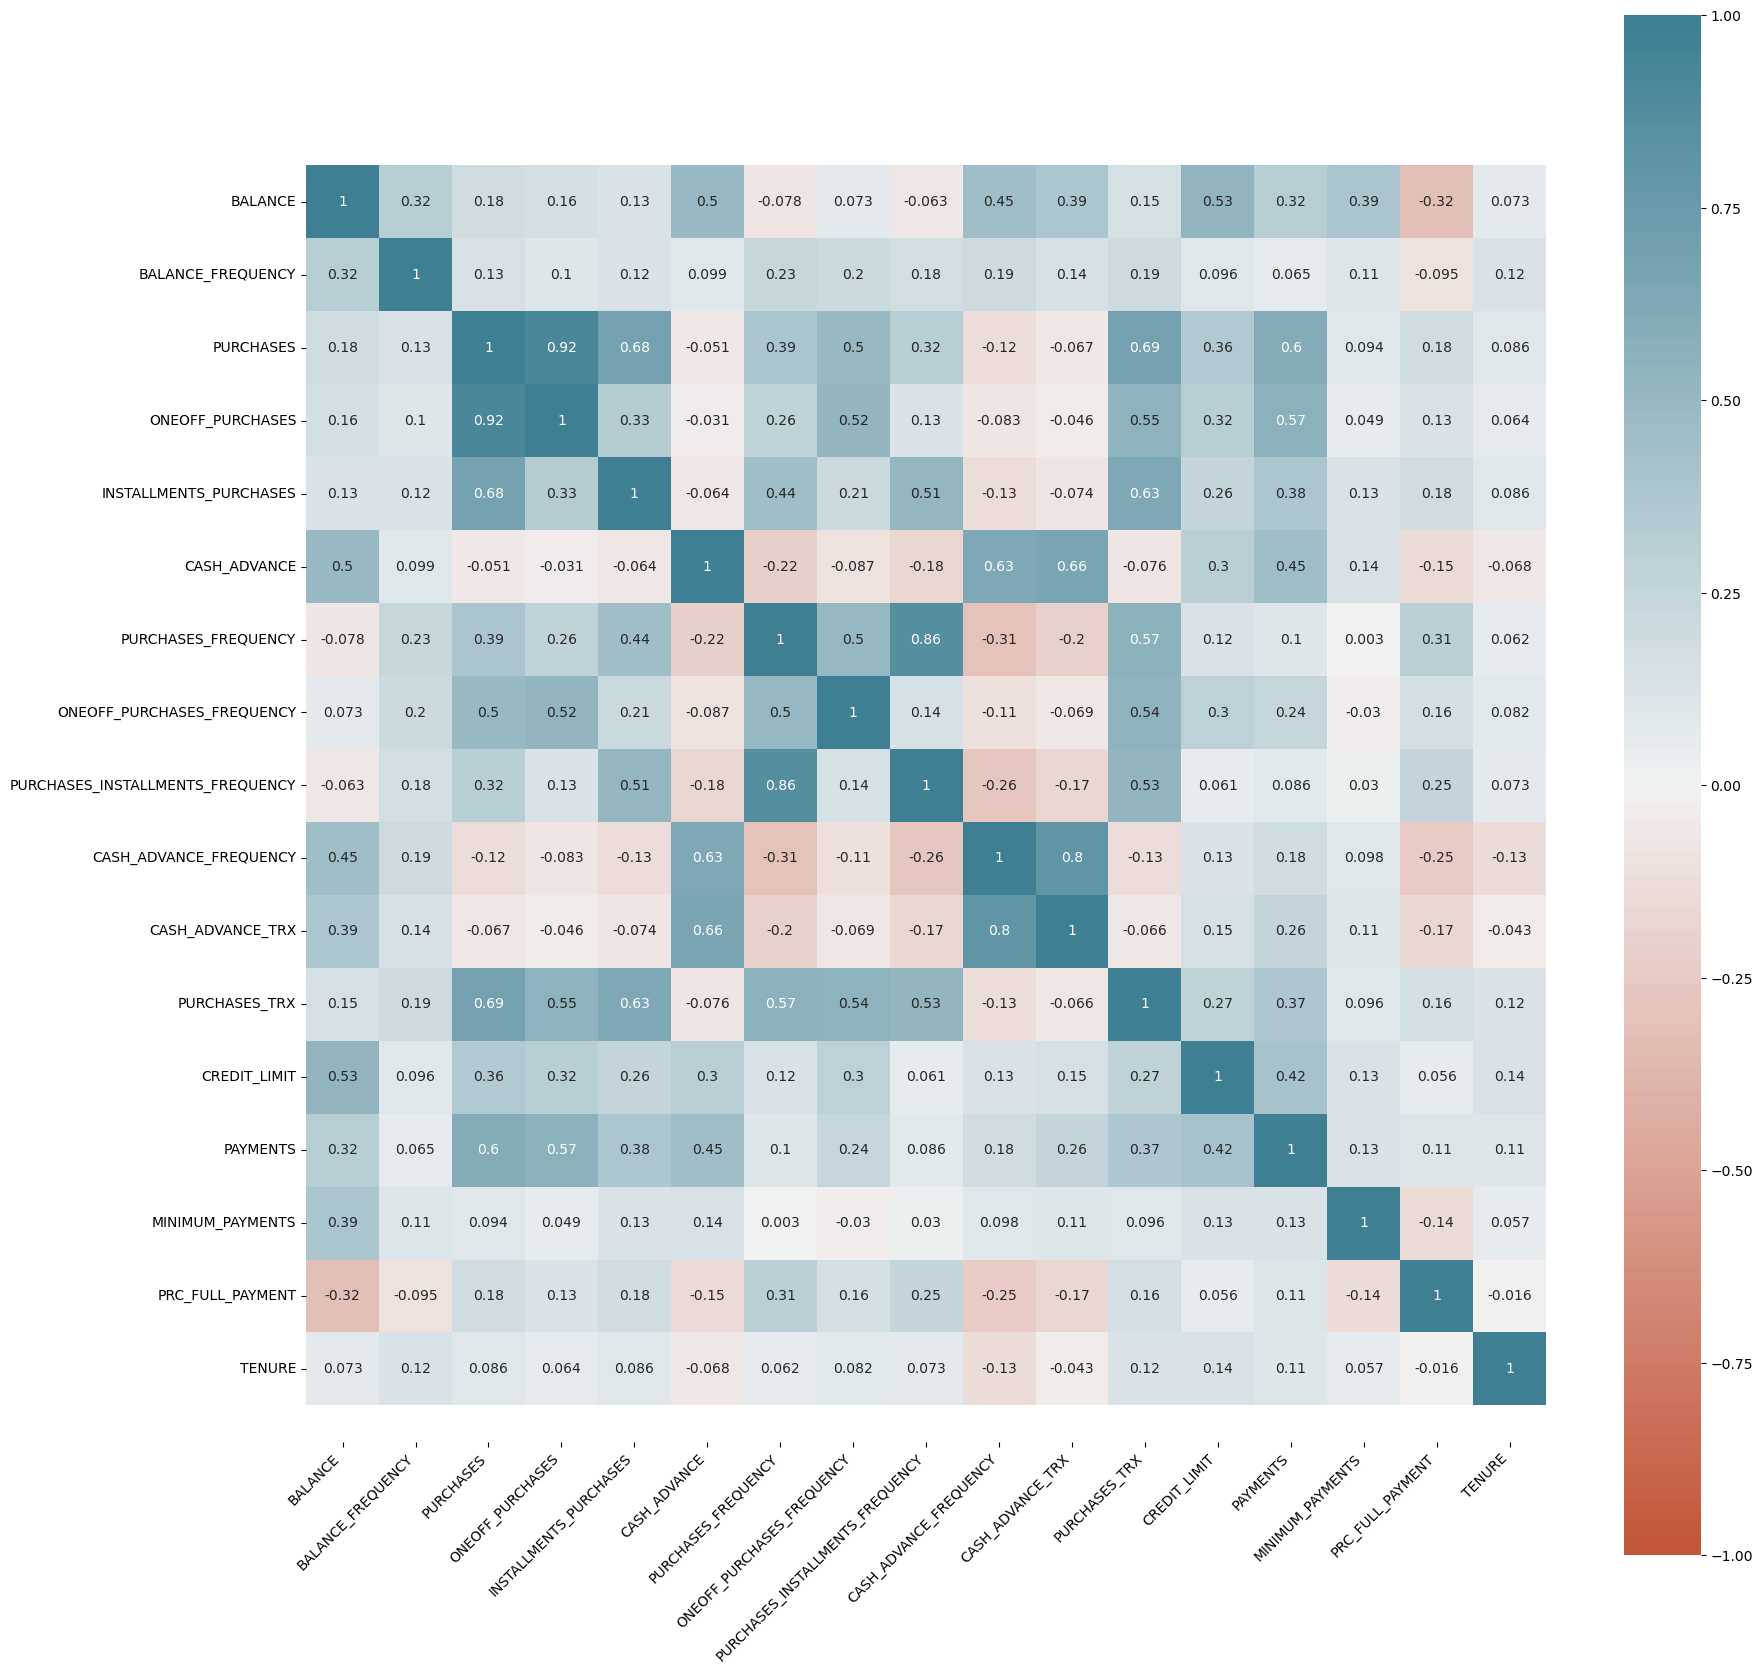

In [17]:
#Visualising the correlation between variables

import seaborn as sns
corr =data.corr()

plt.figure(figsize=(20, 20))
ax = sns.heatmap(
    corr,
    vmin=-1, vmax=1, center=0,
    cmap=sns.diverging_palette(20, 220, n=200),
    square=True, annot = True
)
ax.set_xticklabels(
    ax.get_xticklabels(),
    rotation=45,
    horizontalalignment='right'
)
ax.set_ylim(len(corr)+0.5, -0.5);


###### - Since all of the variables are numerics, it will easier to see their correlation by using correlation matrix.
###### - Most of the variables are having positive correlation rather than negative ones.
###### - Some of them are strongly correlated, just like PURCHASES and ONEOFF_PURCHASES, indicating most customers spend their purchase in one-go, the same thing goes to PURCHASES_FREQUENCY and PURCHASES_INSTALLMENTS_FREQUENCY. It indicates that there some strong multicollinearity between them.
###### - The PURCHASES and PURCHASES_TRX has strong correlation, indicating that the amount of purchase comes along with the transaction numbers.
###### - Some interesting findings can be also found between CASH_ADVANCE and the BALANCE. It seems that customers with bigger balance  tends to have payment with cash in advance.
###### - Customers with bigger BALANCE tends to have  bigger CREDIT_LIMIT, since their correlation is positive (0.54).
###### - TENURE seems to have a weak correlation with other variables, it seems TENURE is not affected by the customer’s behavior.

## Data Distribution

<AxesSubplot:xlabel='BALANCE', ylabel='Count'>

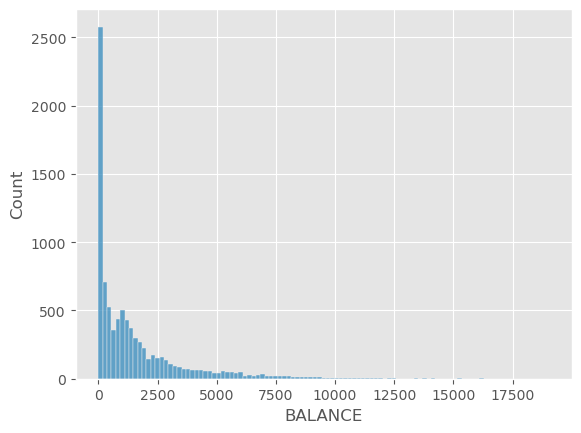

In [131]:
sns.histplot(data['BALANCE'])


###### It seems most of the customers who use their Credit Card would maximize the usage of their credit balance, until it reaches 0.

<AxesSubplot:xlabel='PURCHASES', ylabel='Count'>

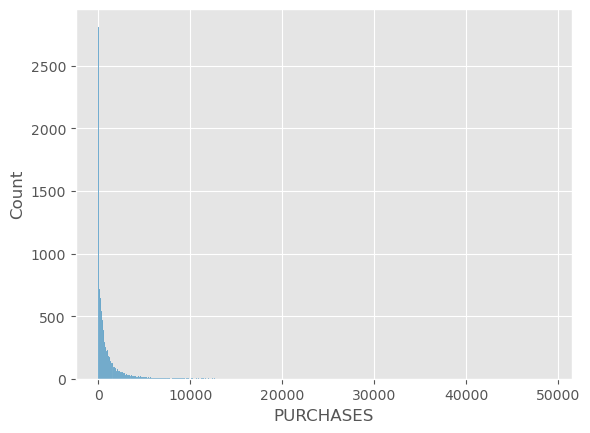

In [133]:
sns.histplot(data['PURCHASES'])

###### Most of the customers don’t use their Credit Card for purchases . Only around 38% use their Credit Card for purchasing. (Purchase value > 0).

<AxesSubplot:xlabel='CREDIT_LIMIT', ylabel='Count'>

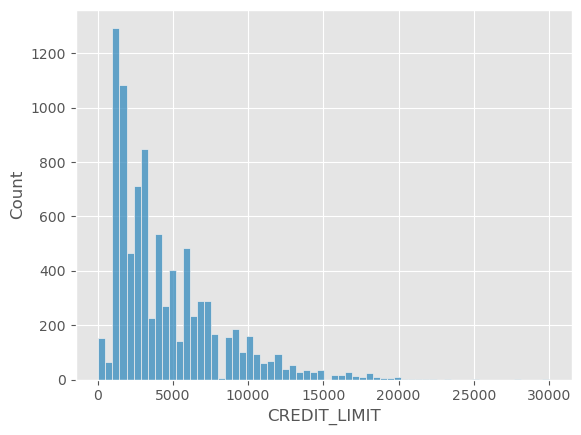

In [134]:
sns.histplot(data['CREDIT_LIMIT'])

##### Most of the customers have Credit Limit of 1032 (there are 144 customers with 0 credit limit,  The frequency goes lower along with the increment of Credit Limit.

<AxesSubplot:xlabel='TENURE', ylabel='count'>

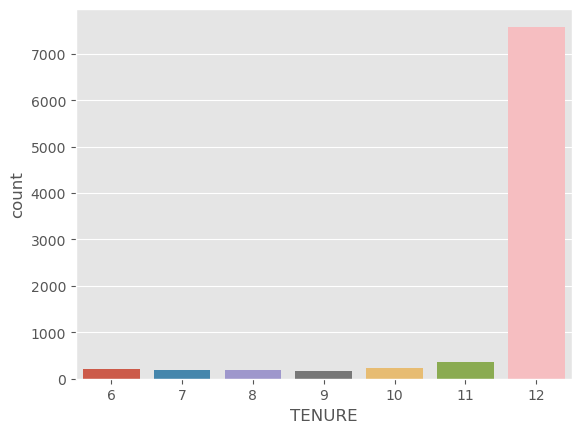

In [137]:
sns.countplot(data['TENURE'])

##### Most of the customers have 12 months Tenure, with significant numbers compared to other tenure.

In [18]:
df = list(data.select_dtypes(include=['float64', 'int64']).columns)

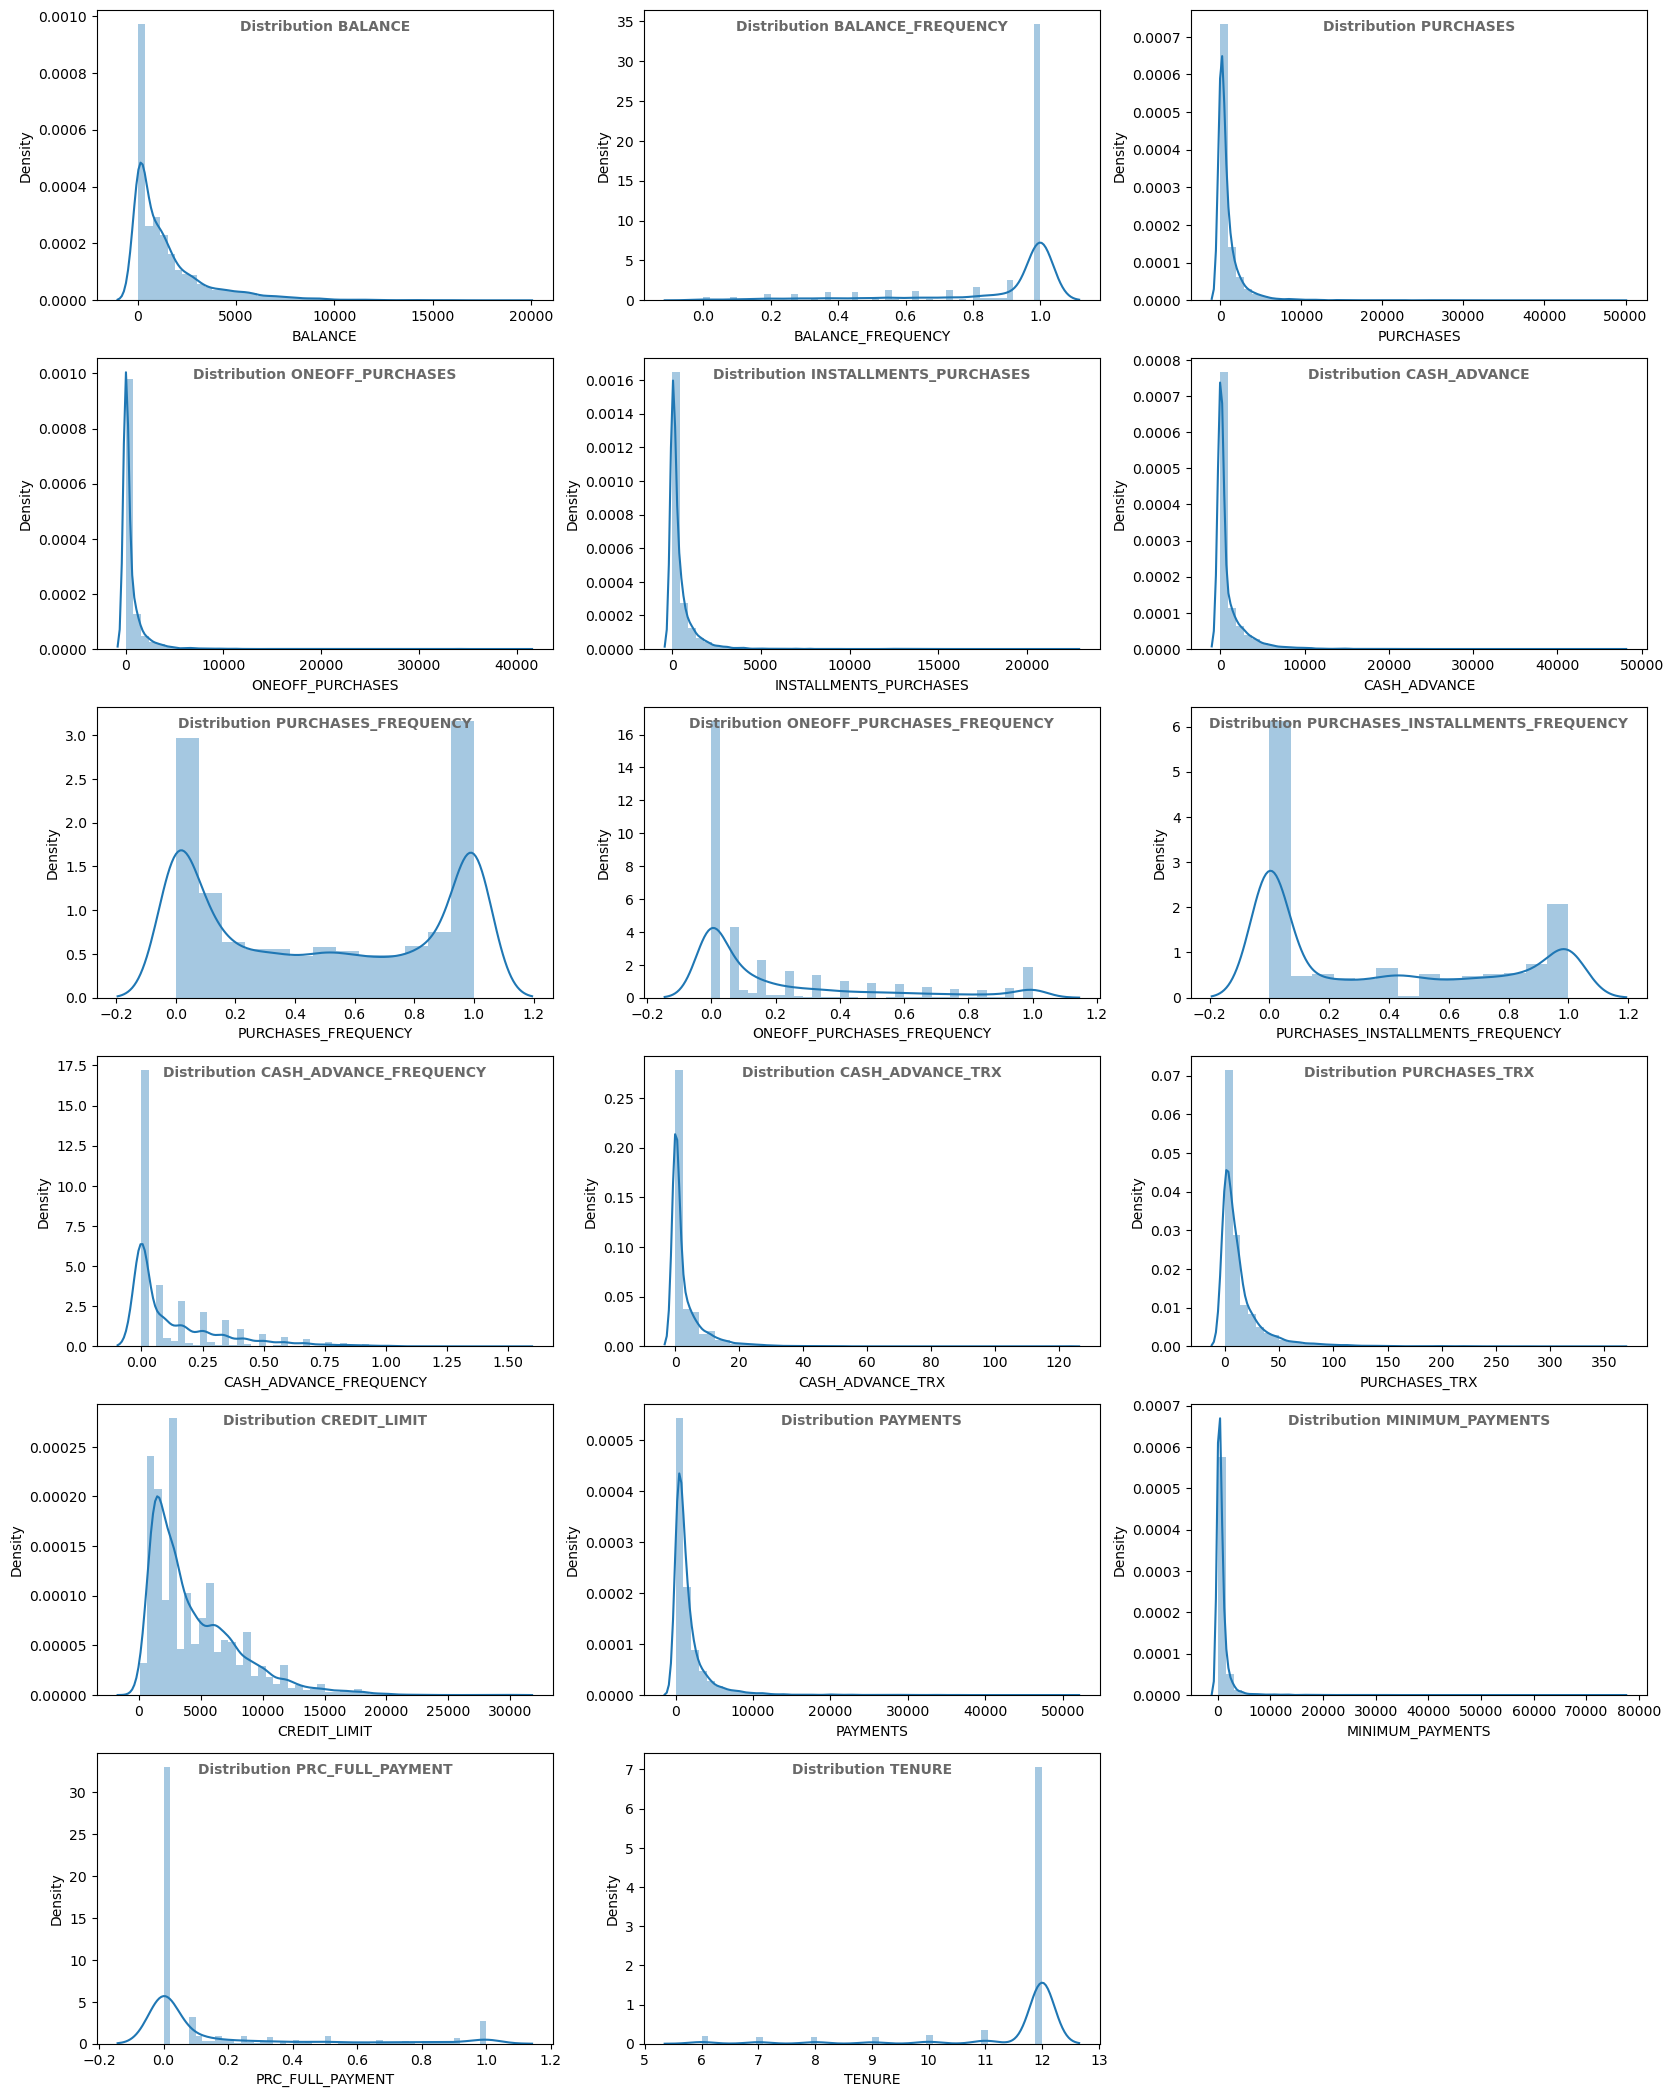

In [19]:
plt.figure(figsize = (20,40))
x = 1
for column in df:
    plt.subplot(9, 3, x)
    
    
    
    
    
    
    
    
    
    
    
    
    
    sns.distplot(data[column])
    plt.title('Distribution {}'.format(column), fontsize=10, color ='dimgrey', fontweight = 'bold', y=0.90)
    x += 1

#### From the above distribution plot, we see that the data has an asymmetrical distribution and is arranged in different scales. In order to deal with these obstacles, we will use normalization to place all columns on the same scale. 

In [20]:
#Normalising the data

x = data

In [21]:
from sklearn.preprocessing import StandardScaler
sc = StandardScaler()
x_scaled = sc.fit_transform(x)
x_scaled

array([[-0.73198937, -0.24943448, -0.42489974, ..., -0.31096755,
        -0.52555097,  0.36067954],
       [ 0.78696085,  0.13432467, -0.46955188, ...,  0.08931021,
         0.2342269 ,  0.36067954],
       [ 0.44713513,  0.51808382, -0.10766823, ..., -0.10166318,
        -0.52555097,  0.36067954],
       ...,
       [-0.7403981 , -0.18547673, -0.40196519, ..., -0.33546549,
         0.32919999, -4.12276757],
       [-0.74517423, -0.18547673, -0.46955188, ..., -0.34690648,
         0.32919999, -4.12276757],
       [-0.57257511, -0.88903307,  0.04214581, ..., -0.33294642,
        -0.52555097, -4.12276757]])

## Clustering Algorithm

In [26]:
#Hierachical Clustering

from sklearn.cluster import AgglomerativeClustering #Importing our clustering algorithm : Agglomerative
model=AgglomerativeClustering(n_clusters=5, affinity='euclidean', linkage='complete')
clust_labels=model.fit_predict(x_scaled)

In [28]:
agglomerative=pd.DataFrame(clust_labels)
agglomerative

,0
0,1
1,1
2,1
3,1
4,1
...,...
8945,1
8946,1
8947,1
8948,1


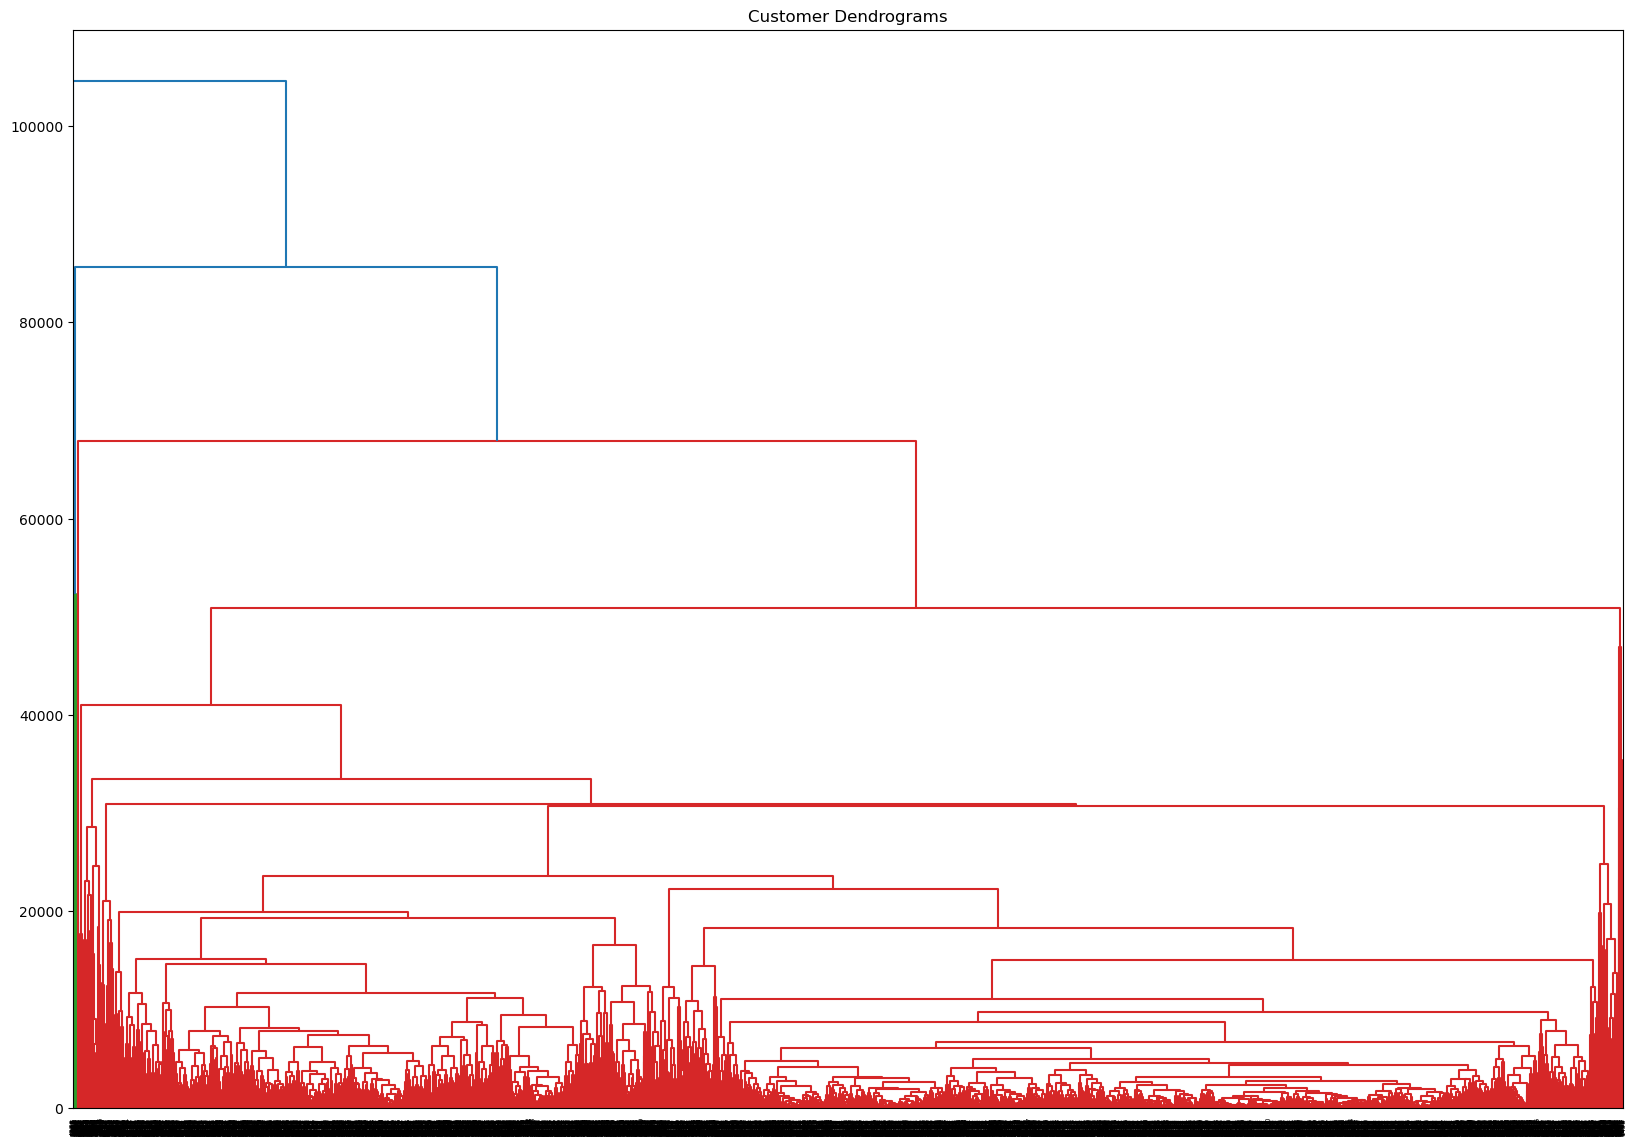

In [31]:
import matplotlib.pyplot as plt
import scipy.cluster.hierarchy as shc
plt.figure(figsize=(20,14))
plt.title("Customer Dendrograms")
dend=shc.dendrogram(shc.linkage(data, method="complete"))

## K-Means Clustering

### Dimension Reduction using PCA
###### We apply Principal Component Analysis (PCA) to transform the data into 2 dimensions. PCA transforms a large set of variables into a smaller one that still contains most of the information in the large set. Reducing the number of variables in a dataset.

In [138]:
pca = PCA(n_components = 10) 
X_principal = pca.fit_transform(x_scaled) 
X_principal = pd.DataFrame(X_principal) 
X_principal.columns = ['PC1', 'PC2', 'PC3', 'PC4', 'PC5', 'PC6', 'PC7', 'PC8', 'PC9', 'PC10'] 
X_principal.head(2)

,PC1,PC2,PC3,PC4,PC5,PC6,PC7,PC8,PC9,PC10
0,-1.682220,-1.076451,0.488507,0.665552,0.018225,0.050629,0.829144,-0.039303,0.115340,-0.077774
1,-1.138295,2.506477,0.601212,-0.120437,0.605803,-1.136841,-0.374507,0.132411,0.687878,-0.777671


## Choosing The Optimal K

#### Sum Of Squared Error

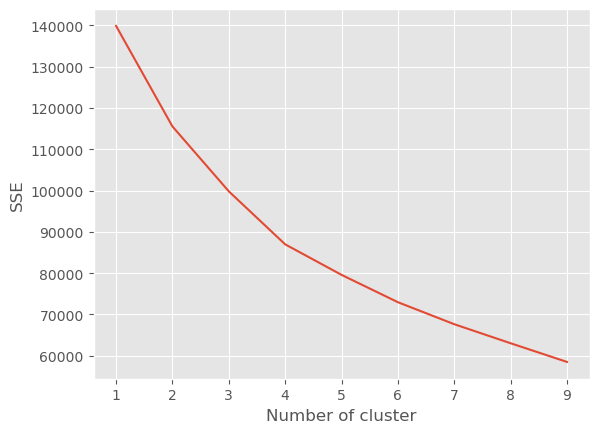

In [139]:
sse = {}
for k in range(1, 10):
    kmeans = KMeans(n_clusters=k, max_iter=1000).fit(X_principal)
    sse[k] = kmeans.inertia_ 
plt.figure()
plt.plot(list(sse.keys()), list(sse.values()))
plt.xlabel("Number of cluster")
plt.ylabel("SSE")
plt.show()

###### The Elbow point of the curve is 4, it means the best number of clusters in this case will be 4.

In [140]:
kmean= KMeans(4)
kmean.fit(x_scaled)
labels=kmean.labels_

In [142]:
clusters=pd.concat([data, pd.DataFrame({'CLUSTERS':labels})], axis=1)
clusters.head()

,BALANCE,BALANCE_FREQUENCY,PURCHASES,ONEOFF_PURCHASES,INSTALLMENTS_PURCHASES,CASH_ADVANCE,PURCHASES_FREQUENCY,ONEOFF_PURCHASES_FREQUENCY,PURCHASES_INSTALLMENTS_FREQUENCY,CASH_ADVANCE_FREQUENCY,CASH_ADVANCE_TRX,PURCHASES_TRX,CREDIT_LIMIT,PAYMENTS,MINIMUM_PAYMENTS,PRC_FULL_PAYMENT,TENURE,CLUSTERS
0,40.900749,0.818182,95.40,0.00,95.4,0.000000,0.166667,0.000000,0.083333,0.000000,0,2,1000.0,201.802084,139.509787,0.000000,12,0
1,3202.467416,0.909091,0.00,0.00,0.0,6442.945483,0.000000,0.000000,0.000000,0.250000,4,0,7000.0,4103.032597,1072.340217,0.222222,12,2
2,2495.148862,1.000000,773.17,773.17,0.0,0.000000,1.000000,1.000000,0.000000,0.000000,0,12,7500.0,622.066742,627.284787,0.000000,12,1
3,1666.670542,0.636364,1499.00,1499.00,0.0,205.788017,0.083333,0.083333,0.000000,0.083333,1,1,7500.0,0.000000,864.206542,0.000000,12,0
4,817.714335,1.000000,16.00,16.00,0.0,0.000000,0.083333,0.083333,0.000000,0.000000,0,1,1200.0,678.334763,244.791237,0.000000,12,0


#### Visualising Our Clusters.

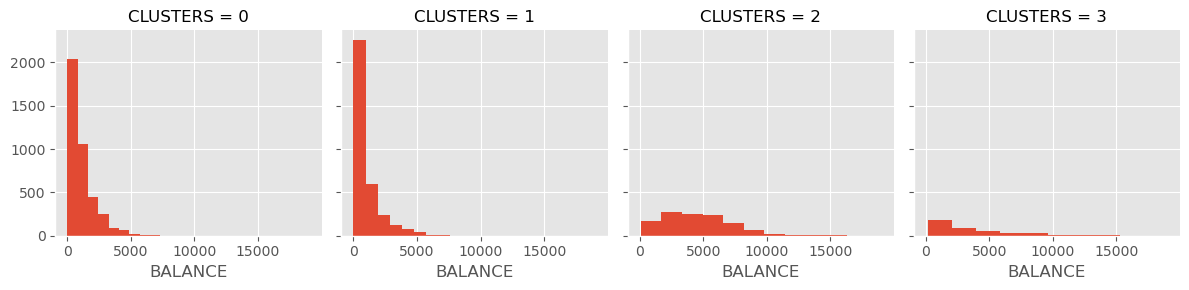

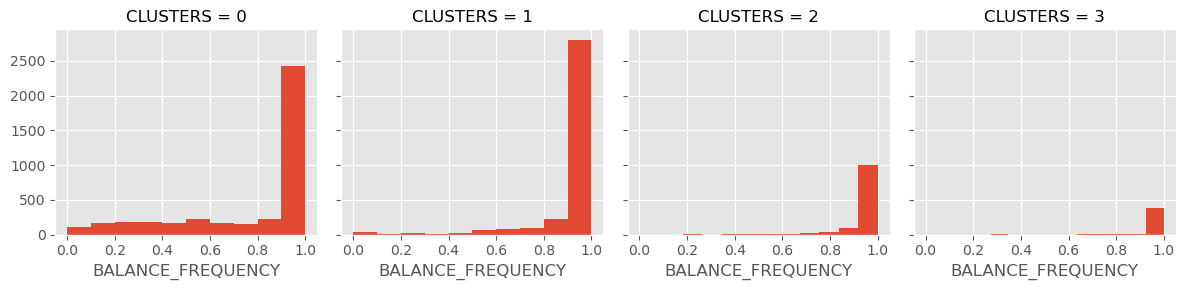

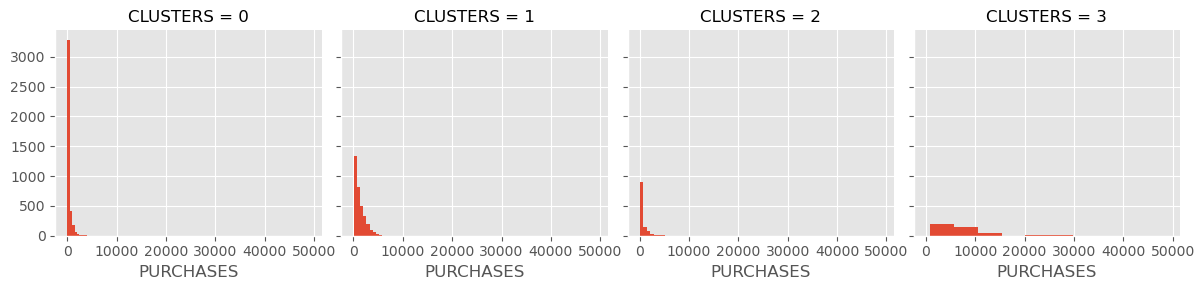

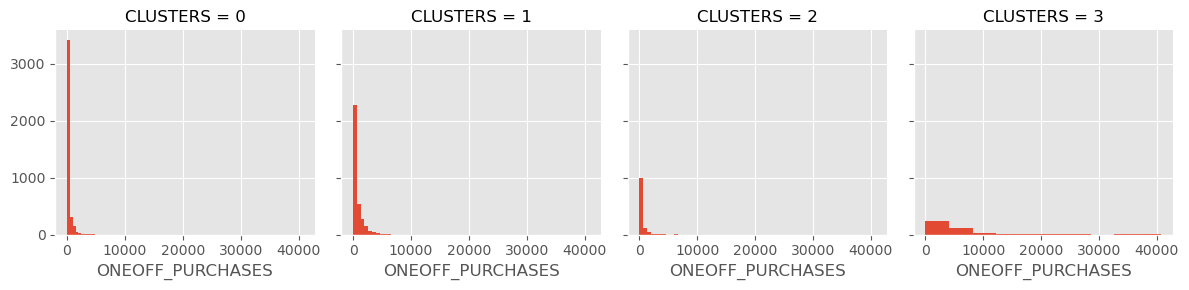

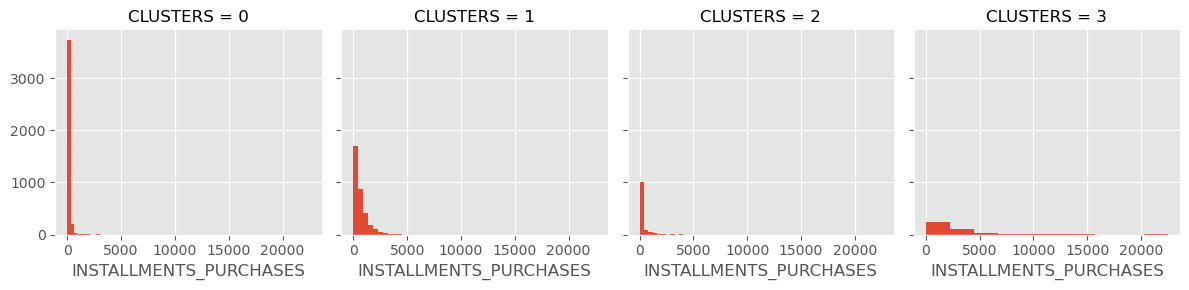

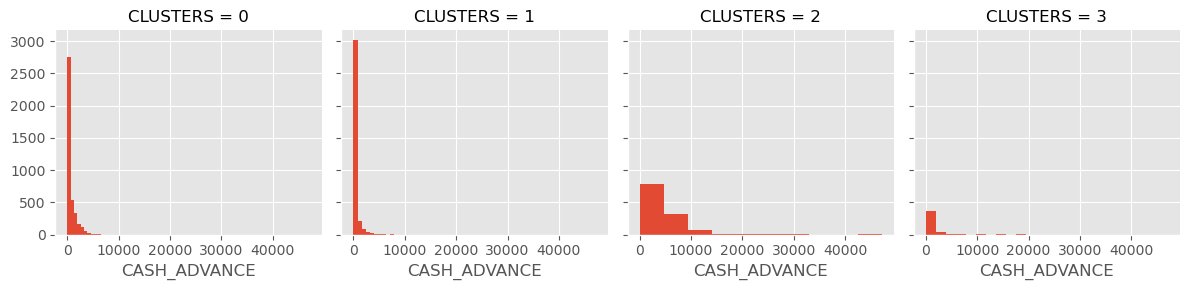

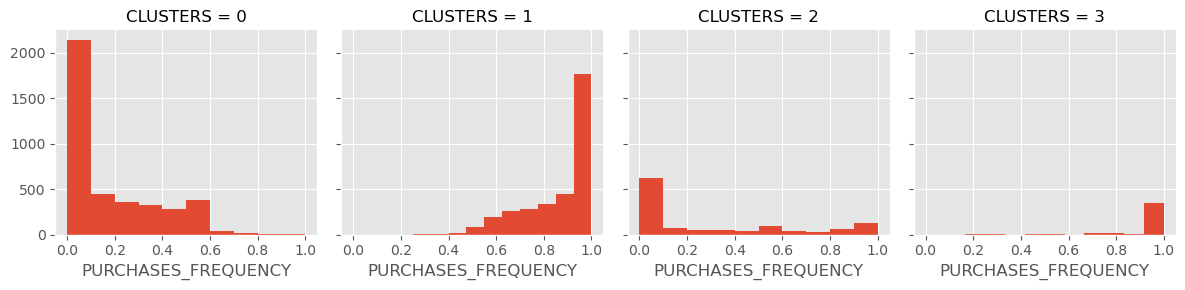

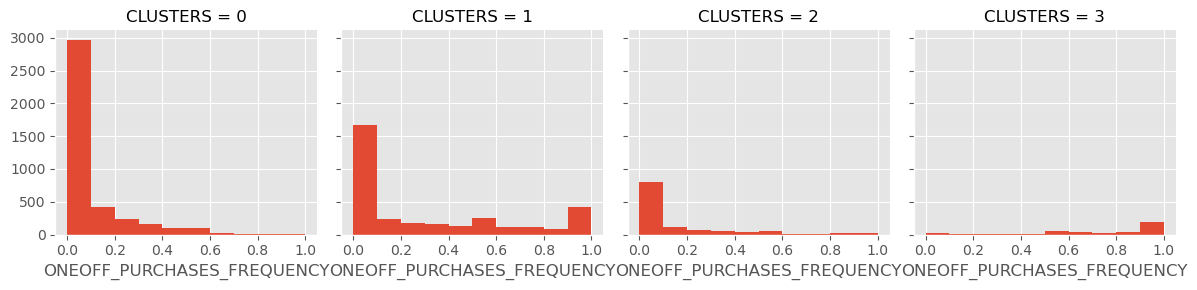

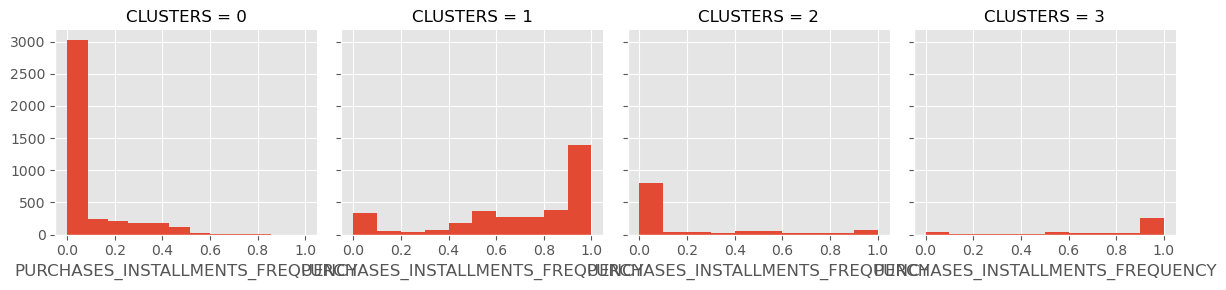

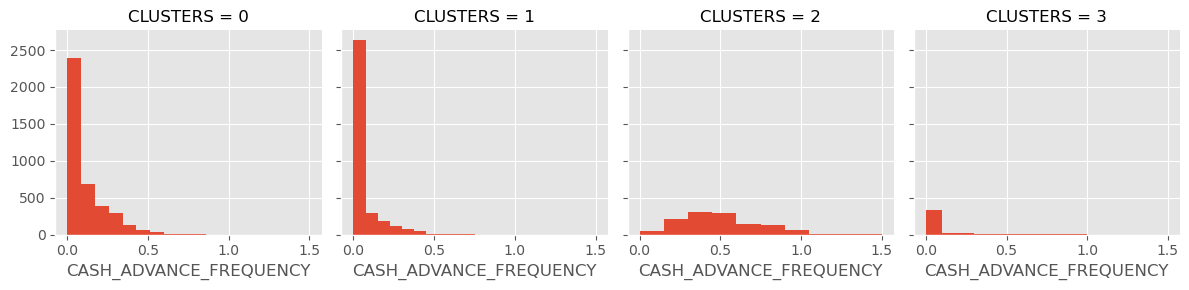

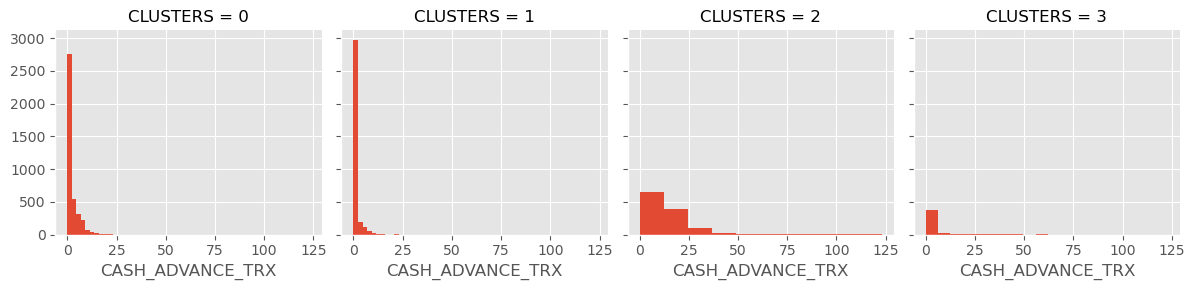

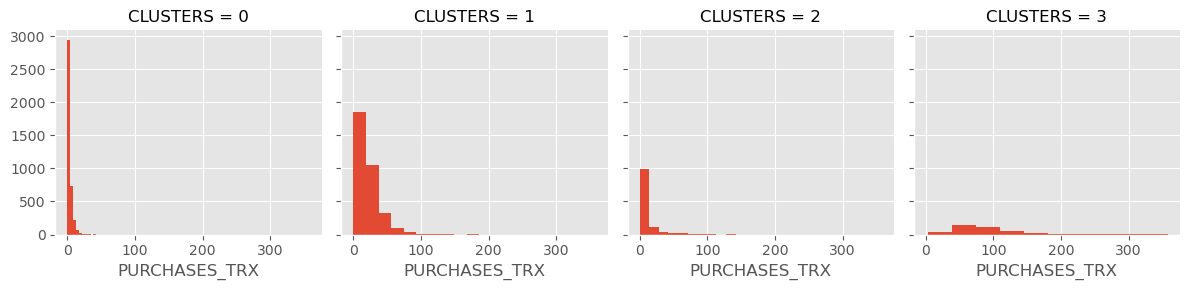

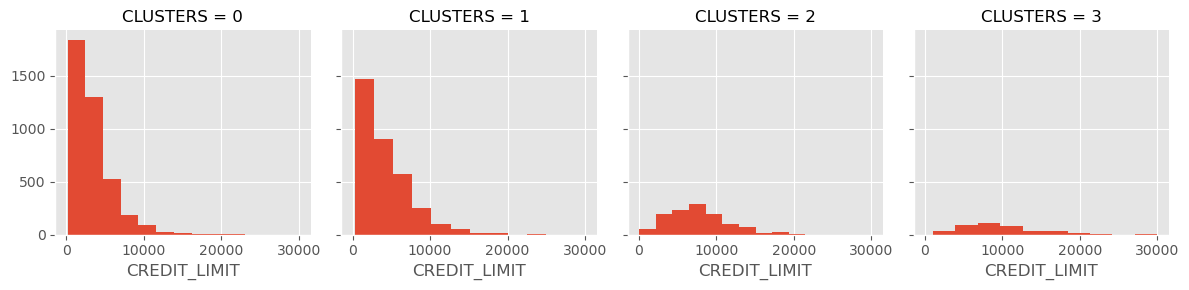

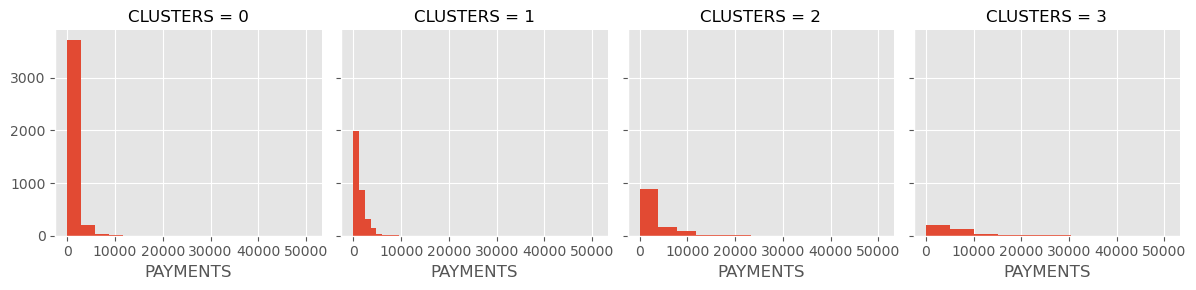

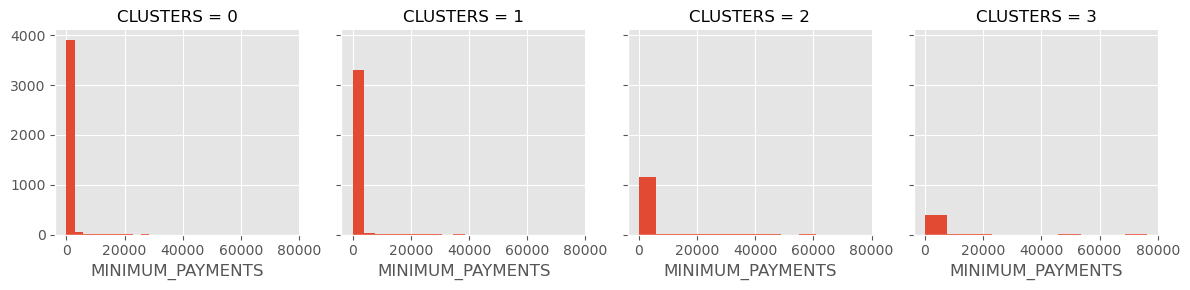

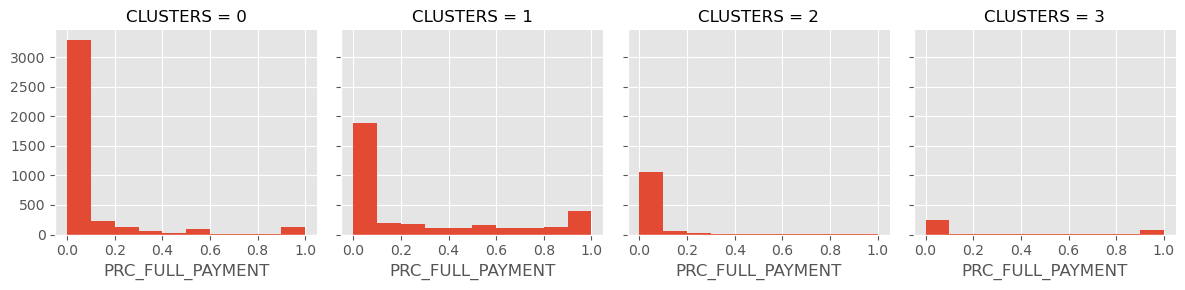

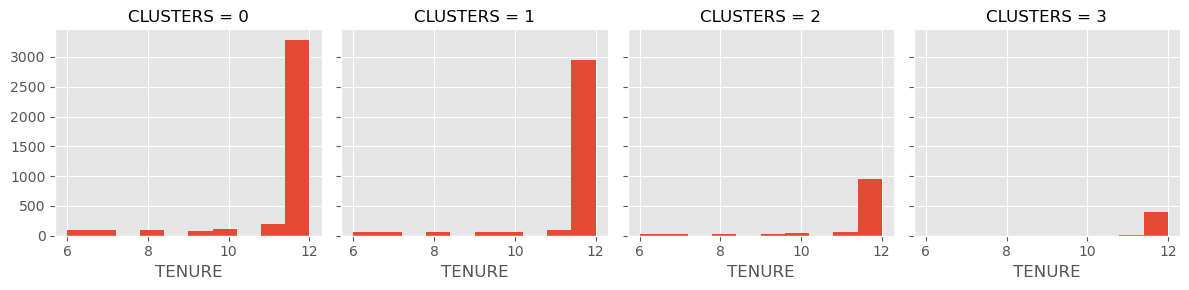

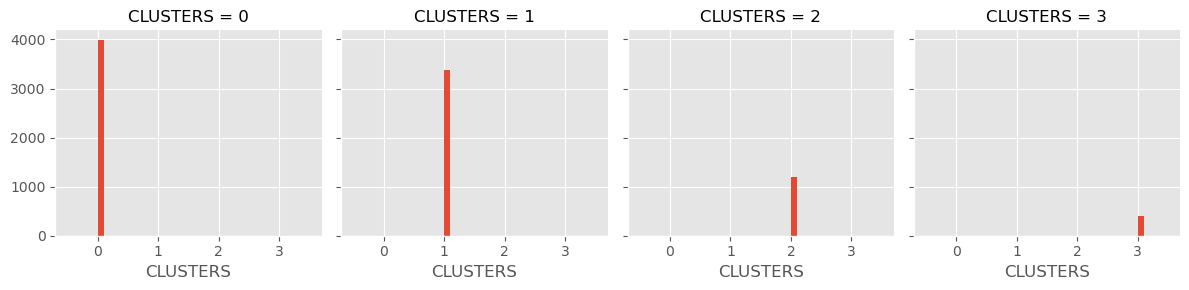

In [143]:
for c in clusters:
    grid= sns.FacetGrid(clusters, col='CLUSTERS')
    grid.map(plt.hist, c)

In [144]:
clusters['CLUSTERS'].value_counts()

0    3987
1    3368
2    1187
3     408
Name: CLUSTERS, dtype: int64

In [145]:
finalDf = pd.concat([X_principal, pd.DataFrame({'cluster':labels})], axis = 1)
finalDf.head()

,PC1,PC2,PC3,PC4,PC5,PC6,PC7,PC8,PC9,PC10,cluster
0,-1.682220,-1.076451,0.488507,0.665552,0.018225,0.050629,0.829144,-0.039303,0.115340,-0.077774,0
1,-1.138295,2.506477,0.601212,-0.120437,0.605803,-1.136841,-0.374507,0.132411,0.687878,-0.777671,2
2,0.969684,-0.383520,0.102371,1.209266,-2.172584,-0.217222,-1.573258,-0.169548,-0.883727,-0.001939,1
3,-0.873628,0.043166,1.460167,1.151980,0.295632,-0.123689,-0.280759,-0.559099,-0.146564,0.393144,0
4,-1.599434,-0.688581,0.365094,0.990232,-0.487039,0.075060,0.707923,0.208399,0.584619,-0.121734,0


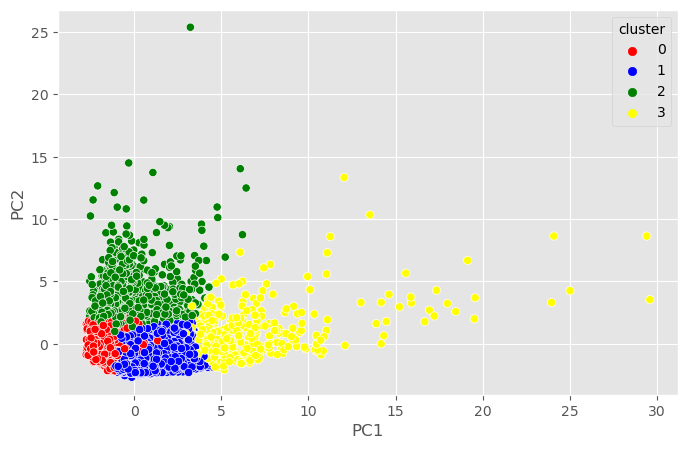

In [146]:
plt.figure(figsize=(8,5))
ax = sns.scatterplot(x="PC1", y="PC2", hue="cluster", data=finalDf,palette=['red','blue','green', 'yellow'])
plt.show()

## Conclusion

#### Cluster 0 : The customers in this cluster indicates a large group of customers who have low balances, small spenders (low purchase) with the lowest credit limit.

#### Cluster 1 : The customers in this cluster indicates a small group of customers who have medium balances, spenders (high purchase) with the highest credit limit.

#### Cluster 2 : The customers in this cluster indicates a small group of customers who have high balances and cash advances, low purchase frequency with high credit limit. 

#### Cluster 3: The customers in this cluster  actually are potential Customers. They give a lot cash in advance, but unfortunatley their spending on Purchases is still minimum.
 
 